# Dark Matter Mass in a distant Galaxy

Galaxies follow a well-modelled distribution of stars and their masses as a function of distance from the galaxy centre. These together create a gravitational potential of the galaxy in which the stars revolve. However, observed stellar revolution rates are in stark disagreement with calculated values. This discrepancy can be attributed to the presence of dark matter halo around the galaxy, which creates a potential that fits with the observed velocities.

Your task in this assignment is to estimate the amount of dark matter in the halo of a distant galaxy, KriGal. 

## Finding the radius-velocity curve

The following file(darkmatter.csv) contains observation data of the stars, a small section of which belong to the galaxy KriGal. Open the file and take a look to get an idea of what observations were made. Such data for stars this far are in practice impossible to measure with such precision, but were made possible for the first time in the history of space observation with KIT (Krittika's Incredible Telescope).

It is known the galaxy's centre has (RA, Dec) = $(140.76398^0, 75.5344^0)$

Open the CSV file, find the relative RA/Dec difference of each star w.r.t. the galaxy's centre and convert all data to SI units - would be handy later on. 


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
from astropy import units as u
from astropy import constants as const


Loading the csv file into python workspace after skipping its first row(Headers)

In [64]:
dark_data = np.loadtxt('darkmatter.csv', skiprows = 1, delimiter = ',')
G = const.G
G.to(u.kpc**3/(u.kg*(u.s)**2))

<Quantity 2.27171627e-69 kpc3 / (kg s2)>

In [65]:
galaxy_center_RA,galaxy_center_Dec = 140.76398*np.pi/180*(u.radian) , 75.5344*np.pi/180*(u.radian)

stars_RA = (np.pi/180)*dark_data[:,0]*(u.radian)
stars_Dec = (np.pi/180)*dark_data[:,1]*(u.radian)
stars_properMotion = dark_data[:,2]*0.001*(u.arcsec/u.year) # in miliarcsec/year
stars_redshift = dark_data[:,3] # dimensionaless quantity 

stars_properMotion = stars_properMotion.to(u.rad/u.s) # in rad/s
stars_properMotion = stars_properMotion*(1/u.rad)

#Relative RA and Dec values w.r.t galaxy's center
stars_relative_RA = stars_RA - galaxy_center_RA
stars_relative_Dec = stars_Dec - galaxy_center_Dec


Assume the galaxy is 3500 kpc (kiloparsecs) away and the centre of galaxy moves according to Hubble's law (H = $70$ km/s/Mpc). Note that the redshift $z$ is related to the radial velocity of any object as

$$ z = \sqrt{\frac{c+v}{c-v}} - 1$$
where $c$ = speed of light, and $v$ = velocity of object, taken positive when object moves away from us.

Also 1 parsec = $3.083 \times 10^{16}$ metres

Using this, find the relative radial velocities of the stars w.r.t. the centre of galaxy.


In [66]:
#code
D_galaxy = 3.5*(u.Mpc) # in Mpc
H = 70*(u.km/(u.s*u.Mpc)) # in Km/s/Mpc
c = 300000*(u.km/u.s) # in km/s
galaxy_radial_vel = H*D_galaxy # in km/s
# Radial velocity as observed from Earth
stars_radial_vel = c*((((stars_redshift + 1)**2) - 1)/(((stars_redshift + 1)**2) + 1)) # in km/s
print(stars_radial_vel)
# I have found the total relative velocity w.r.t galaxy's center below

[ 3.67971006e+02  1.31257569e+02  2.70769584e+02  1.16627281e+02
  2.87801324e+02  2.94242083e+02  9.84397966e+01  2.34437765e+02
  1.47481899e+02  1.44186777e+02  2.28171863e+02  1.69707100e+02
  1.74691180e+02  1.36378977e+02  3.28860332e+02  2.56133048e+02
  1.27187025e+02  2.42096890e+02  1.94145344e+02  2.55211114e+02
  3.93873924e+02  1.22191243e+02  3.93041969e+02  1.51300978e+02
  2.73916519e+02  3.30863915e+02  2.82937384e+02  2.12389857e+02
  2.06567407e+02  2.81130194e+02  1.96126286e+02  1.78320094e+02
  2.33412621e+02  3.50240595e+02  9.63880431e+01  1.16461093e+02
  9.78675882e+01  2.75846299e+02  3.88174093e+02  3.21652913e+02
  3.55578273e+02  3.31249700e+02  2.79019817e+02  2.56150691e+02
  3.17262163e+02  2.48148233e+02  2.96856622e+02  3.78962302e+02
  2.90050112e+02  1.37792941e+02  3.66637317e+02  1.06164891e+02
  1.20665504e+02  3.45441019e+02  2.38534648e+02  3.99733504e+02
  3.43948438e+02  1.06212801e+02  1.30854782e+02  1.62865301e+02
  3.55604751e+02  2.91636

Use the previous information to find the tangential velocities of the stars. 

Assume the stars move in perfectly circular orbits and we view the galaxy edge-on i.e. to us the star trajectories appear like line segments.


In [67]:
#code
# Using Hubble's Law below 
distance_stars = np.abs(stars_radial_vel)/H # in Mpc , Negative speed of separation means its moving towards us
stars_tangential_vel = stars_properMotion * distance_stars 
stars_tangential_vel = stars_tangential_vel.to(u.km/u.s) # tangential velocity as observed from Earth
#                                                     ^u.rad is multiplied here so as to avoid 'UnitConversionError'

Now find the angular separation from galaxy centre to each star and use that to find the tangential separation (in length units) from the galaxy centre.

In [68]:
#code
# Angular separation obtained in radians below
stars_ang_separation =np.arccos((np.sin(stars_Dec))*(np.sin(galaxy_center_Dec)) + (np.cos(stars_Dec))*(np.cos(galaxy_center_Dec))*(np.cos(stars_relative_RA )))

stars_tang_separation = np.sin(np.abs(stars_ang_separation)) * D_galaxy # in Mpc

Find total velocity of each star w.r.t. galaxy centre.

Using angle information obtained from velocity components (assume circular orbits) and tangential distance, find the radial distance and hence the total distance of each star w.r.t. galaxy centre.

Make a scatter plot of velocity v/s radius.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13392\2905625808.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(total_separation, stars_total_vel, s=np.pi*1, c=(0,0,1), alpha=0.6)


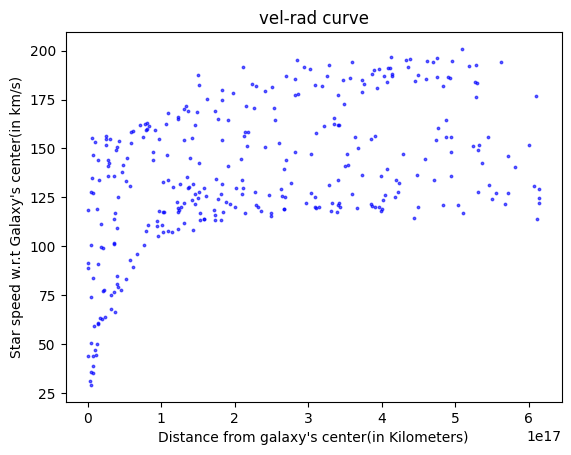

In [69]:
#Assuming galaxy has only radial velocity with respect to Earth's equitorial coordinate system 
# Since stars move in perfectly circular orbits therefore resultant of radial and tangential velocity of star w.r.t Earth will be exactly along the direction of tangent to the orbits around the galaxy's center.
theta = stars_ang_separation# in radians 
stars_total_vel = np.sqrt((stars_radial_vel*np.cos(theta) - stars_tangential_vel*np.sin(theta) - galaxy_radial_vel)**2 + (stars_tangential_vel*np.cos(theta)+stars_radial_vel*np.sin(theta))**2)  # in km/s

stars_radial_separation = stars_tang_separation/np.tan(np.arctan(stars_radial_vel/stars_tangential_vel)) #in MPc(Mega parsecs)

total_separation = np.sqrt((stars_radial_separation**2) + (stars_tang_separation**2)) # in Mpc
total_separation = total_separation.to(u.kpc) # in Kpc

index = np.where(total_separation < 20*u.kpc) # assuming that the galaxy KriGal is of typical radius i.e around 20-30 Kpc

total_separation = total_separation[index]
stars_total_vel = stars_total_vel[index]

total_separation = total_separation.to(u.km)

# index = np.where(stars_total_vel < 100*(u.km/u.s))

# total_separation = total_separation[index]
# stars_total_vel = stars_total_vel[index]

plt.scatter(total_separation, stars_total_vel, s=np.pi*1, c=(0,0,1), alpha=0.6)
plt.title('vel-rad curve')
plt.xlabel("Distance from galaxy's center(in Kilometers)")
plt.ylabel("Star speed w.r.t Galaxy's center(in km/s)")
plt.show()



## Finding halo parameters using the curve

If you have got correctly so far, you would have got a set of points that follow what is known as the **galaxy rotation curve**, a curve that rises steeply first, curves and becomes almost constant from around midway. This rotation curve is evidence for the dark matter halo. The halo is taken to be spherical with the centre at galaxy's centre, with radial density profile given by the [Navarro-Frenk-White (NFW) profile](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile):

$$ \rho (r) = \frac{\rho_0}{\frac{r}{R_s}\left( 1 + \frac{r}{R_s}\right)^2} $$

where $R_s$ is a scale radius whose value is comparable to the radius of the galaxy (i.e. same order of magnitude).

From the density profile, find the expression for mass $M_r$ enclosed in a sphere of radius $r$ (you may include it in a handwritten page photo). Using this find the expression for velocity of a star at radius $r$. Recall that 
$$ \frac{v^2}{r} = \frac{GM_r}{r^2} $$

Once you have the velocity profile, using scipy's curve fitting function (google for syntax and uses!) find the best fit value of $R_s$. You are given that the value of $\rho_0$ is $0.02$ solar masses per cubic parsec. Again, convert it to SI units before processing.

1.3535810646494658e-12


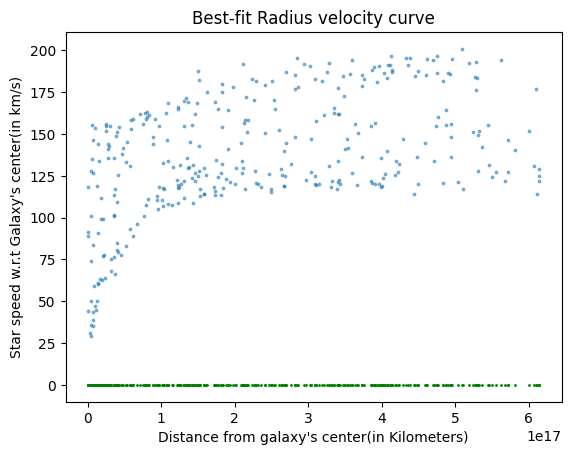

In [93]:
# defining model(functional curve) to which the scatter plot(velocity vs radial separation) is approximated
G = const.G
G = G.to(u.km**3/(u.kg*(u.s)**2))
G = G*(1/(u.km**3/(u.kg*(u.s)**2))) # to make it dimensionless so as to remove 'UnitConversionError' 

rho_0 = 0.02*(u.Msun/u.parsec**3)
rho_0 = rho_0.to(u.kg/u.km**3)
rho_0 = rho_0*(1/(u.kg/u.km**3)) # to make it dimensionless so as to remove 'UnitConversionError' 
print(rho_0)
def NFW(r,R_s):
    return np.sqrt((G*rho_0)*(4*np.pi*(R_s**3)/r)*((np.log((R_s + r)/R_s)) - r/(R_s + r)))



p_opt, p_cov = cf(NFW, total_separation*(1/u.km), stars_total_vel*(1/(u.km/u.s)))

plt.scatter(total_separation,NFW(total_separation*(1/u.km),*p_opt), s = 1, label = 'Best-Fit', color = 'g')
plt.scatter(total_separation,stars_total_vel, s = np.pi*1 , alpha = 0.5, label = 'OG data points')

plt.title("Best-fit Radius velocity curve")
plt.xlabel("Distance from galaxy's center(in Kilometers)")
plt.ylabel("Star speed w.r.t Galaxy's center(in km/s)")
plt.show()


Plot the actual vs curve-fitted plots of velocity and radius. If you have passed only the three required arguments to curve-fit (function name, input and output) you will (likely) notice it doesn't work at all and gives an impossible value for $R_s$! (If you get a good fit in the first try itself, that's great!)

This happens because scipy's initial guess for the parameter is 1 (metre), which is nowhere near the actual value on the order of kiloparsecs. Look up scipy's syntax to see how we can pass in an initial guess ourselves. Now pass on an initial guess (given that you know it's on the order of kiloparsecs) to curve fit. 

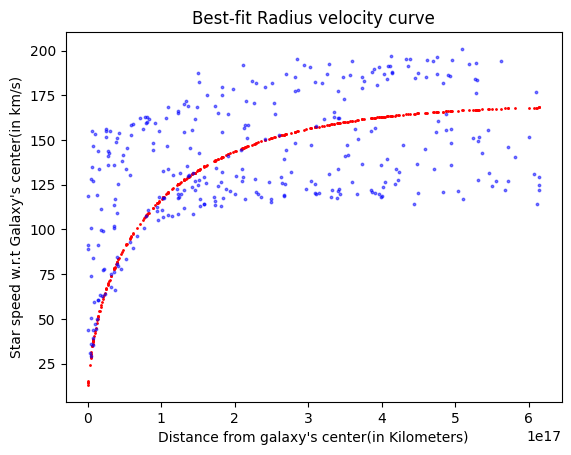

[11.03242572] kpc


In [94]:
initial_guess = 20*u.kpc # assuming that the galaxy KriGal is of typical radius i.e around 20-30 Kpc so that's why i chose intial guess as 20 Kpc
initial_guess = initial_guess.to(u.km)
initial_guess = initial_guess*(1/u.km)

p_opt, p_cov = cf(NFW, total_separation*(1/u.km), stars_total_vel*(1/(u.km/u.s)), p0 = [initial_guess])

plt.scatter(total_separation,NFW(total_separation*(1/u.km),*p_opt), s = 1, label = 'Best-Fit', color = 'r')
plt.scatter(total_separation,stars_total_vel, s = np.pi*1 , alpha = 0.5, label = 'OG data points', color = 'b')

plt.title("Best-fit Radius velocity curve")
plt.xlabel("Distance from galaxy's center(in Kilometers)")
plt.ylabel("Star speed w.r.t Galaxy's center(in km/s)")
plt.show()

R_s = p_opt*u.km
R_s = R_s.to(u.kpc)
rho_0 = rho_0*(u.kg/u.km**3) # running this cell multiple time results in increasing powers of its dimension here!!
print(R_s)

Although the dark matter halo nominally has no end, we define the boundary of the halo to be the radius $R_{vir}$ where the **mean** density of the sphere of radius $R_{vir}$ merges with the background density of the Universe. Write a function calculating mean density for a radius $r$, and find the density at $50R_s$.

In [101]:

R_s = R_s.to(u.km)
def calc_meanDensity(r): # r is passed in as km
    M_r = (4*np.pi*rho_0*(R_s**3))*((np.log((R_s + r)/R_s)) - r/(R_s + r))
    vol_r = (4/3)*np.pi*r**3
    return M_r/vol_r # density in kg/km^3

print(calc_meanDensity(50*R_s).to(u.kg/u.m**3))

[9.58801072e-26] kg / m3


The background density of the Universe is $8.5 \times 10^{-27}$ in SI units. We take the virial radius to be where mean density of sphere is equal to 50 times background density. Find the value of virial radius at which this happens.

Getting an analytical expression for radius from the mean density equation can be difficult. You can either use a numerical solver like Desmos, or more preferably, tweak around with a few values of radius in the mean density function you wrote till you get a density around 40-60 times the background density. Round off to the nearest multiple of $10R_s$.

In [102]:
bg_density = 8.5e-27 * (u.kg/u.m**3)
bg_density = bg_density.to(u.kg/u.km**3)
 
#28*R_s as virial radius is obtained using hit and trial method    
ratio = calc_meanDensity(28*R_s)/bg_density
print(ratio)
virial_radius = 28*R_s # in km
# therefore meanDensity becomes almost 50 times the background density at r = 28*R_s 
# So, the nearest multiple of 10R_s  is 3

[52.2691544]


Using this virial radius, find the total mass contained inside the sphere i.e. the mass of dark matter in the galaxy

In [103]:
total_mass = ((4/3)*np.pi*virial_radius**3)*calc_meanDensity(virial_radius) 
print(total_mass)

[1.61172809e+42] kg
